-----
# 3.3 The leapfrog method - efficient time integration
In this part, we solve a simple one dimensional harmonic oscillator equation using the leapfrog method.

First, we solve the equation for position and velocity for different values of $k$ and plot the results.

Next, we investigate how the initial velocity at the half step affects the accuracy of the method by comparing it to the analytical solution and testing with different sizes of the time steps $\Delta t$.

Finally, we add an external time-dependent sinusoidal driving force and investigate what happens when the driving force is close to the original frequency of the oscillator and show the phase plot (v, x) of various frequencies. 

_by: Anezka Potesilova_

In [1]:
from src.leapfrog import leapfrog, plot_leapfrog_various_k, plot_leapfrog_errors, plot_leapfrog_errors_start_end
import numpy as np
import matplotlib.pyplot as plt

### I. Leapfrog method

We test three values of $k = 0.5, 2, 10$ and the default time step size $\Delta t = 0.01$, and we plot the position and velocity for each of them.

Total time $T$ is used to calculate the number of iterations/steps we will do, i.e. $T = \#steps \cdot \Delta t$.

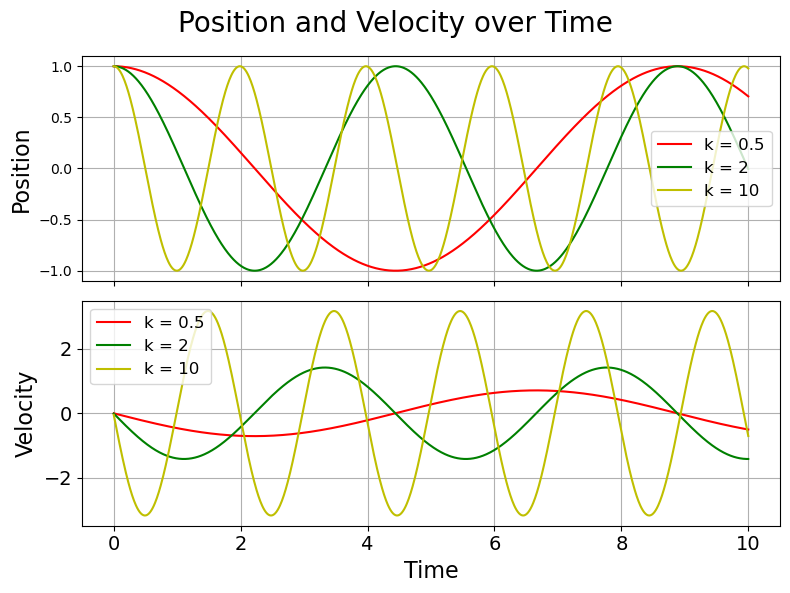

In [2]:
T = 10

def F_x(x, k):
    return -k * x

k_values = [0.5, 2, 10]
positions = []
velocities = []

for k in k_values:
    x_list, v_list = leapfrog(T, F_x, k)
    positions.append(x_list)
    velocities.append(v_list)

plot_leapfrog_various_k(positions, velocities, k_values, T, save=True)

DISCLAIMER: this part is mainly used for internal testing, to see how the curve behaves and compares to the analytical solution. It is not used to draw any major conclusions as there are better tools and measures for this.

Next, we test how the initial velocity at the half step affects the error of the method for two options of the initial velocity and two step sizes and $k = 5$. We can see that setting $v_{1/2} = 0$ introduces an error at the beginning but as the sinusoidal curve moves along, it evens out and then starts to grow again. On the other hand, for our more exact approximation, the error grows over time as expected.

Due to the sinusoidal nature, if we run the simulation for long enough, the curves will eventually match the exact solution again at least for a brief time before diverging again.

Note that we are taking $T=1000$, which means that for the default $\Delta t = 0.01$, we do a total of $100000$ steps.

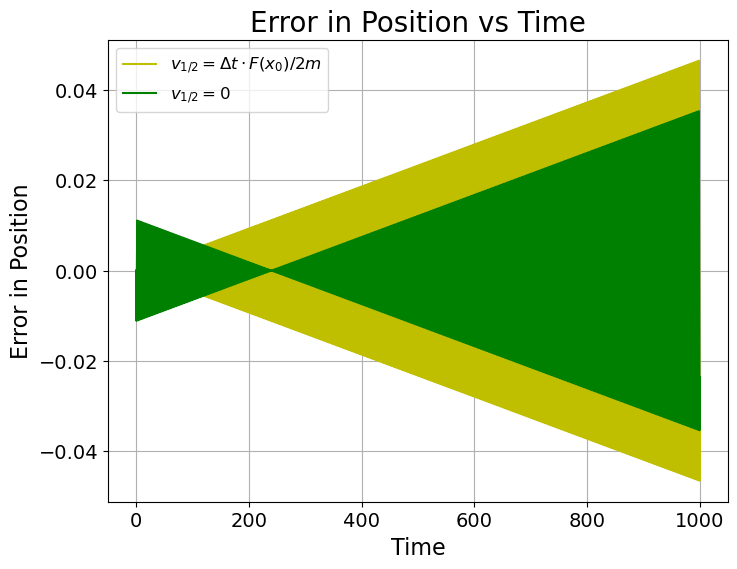

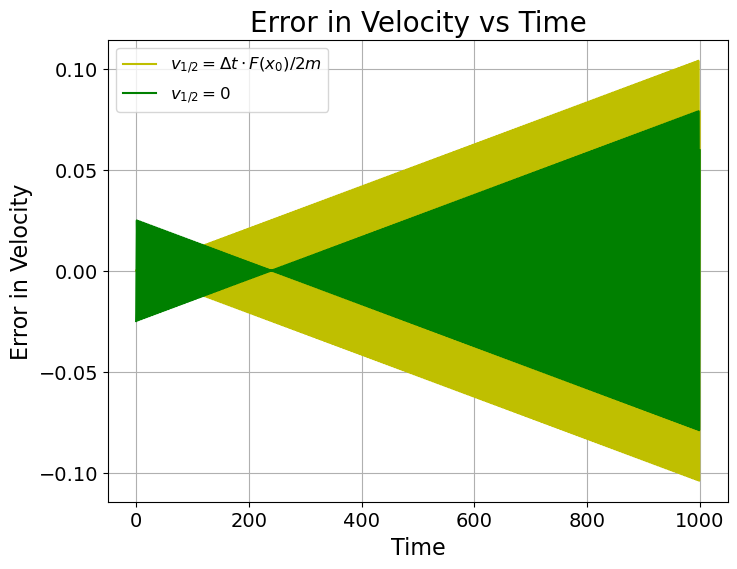

In [6]:
T = 1000
k = 5

def F_x(x, k):
    return -k * x

x_list_avg, v_list_avg = leapfrog(T, F_x, k)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero")

plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False)

Next, we test the same but for $\Delta t = 0.1$.

We can see that the error grows much faster and that indeed it starts to decrease again as the curve approaches the exact solution.

In [4]:
T = 1000
k = 5
delta_t = 0.1

def F_x(x, k):
    return -k * x

x_list_avg, v_list_avg = leapfrog(T, F_x, k, delta_t=delta_t)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero", delta_t=delta_t)

# plot_leapfrog_errors([x_list_avg, x_list_zero], [v_list_avg, v_list_zero], k, T, save=False)

We can also check how the solutions diverge at the beginning of the period vs at the end by looking at $T \in [0,5]$ and $T \in [995,1000]$

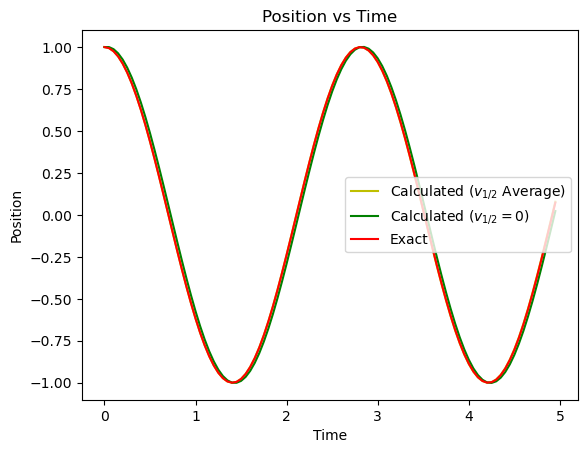

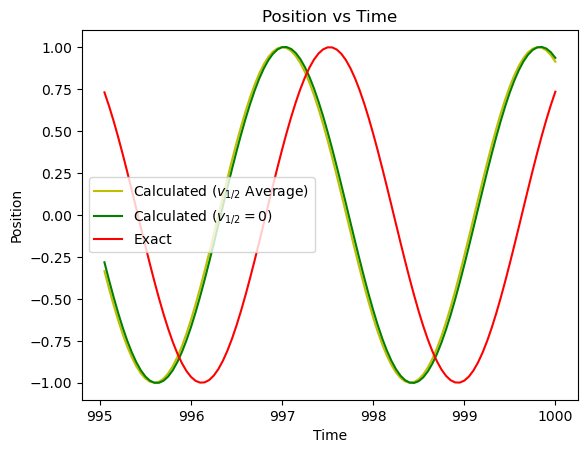

In [5]:
T = 1000
k = 5
delta_t = 0.05

def F_x(x, k):
    return -k * x

x_list_avg, v_list_avg = leapfrog(T, F_x, k, delta_t=delta_t)
x_list_zero, v_list_zero = leapfrog(T, F_x, k, initial_v="zero", delta_t=delta_t)

plot_leapfrog_errors_start_end([x_list_avg, x_list_zero], k, T, delta_t=delta_t, save=False)